# Timing outer_real functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `outer_real_dumb` and `outer_real_numba`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of elements forming the vectors
N = np.array([50, 100, 500, 1000, 3000])

In [3]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
list_time_parallel = []
for Ni in tq(N):
    vector = np.ones(Ni)
    # outer_real_dumb
    time = %timeit -o fcs.outer_real_dumb(vector, vector)
    list_time_dumb.append(time.average)
    # numpy.outer
    time = %timeit -o np.outer(vector, vector)
    list_time_numpy.append(time.average)
    # outer_real_numba
    time = %timeit -o fcs.outer_real_numba(vector, vector)
    list_time_numba.append(time.average)
    # outer_real_parallel
    time = %timeit -o fcs.outer_real_parallel(vector, vector)
    list_time_parallel.append(time.average)

327 µs ± 6.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.8 µs ± 362 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.12 µs ± 363 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
91.5 µs ± 40.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
687 µs ± 55.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
25.7 µs ± 778 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
14.6 µs ± 345 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
234 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.59 ms ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
354 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
321 µs ± 775 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
202 µs ± 643 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.68 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.47 ms ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 1000 l

In [4]:
list_time_dumb = np.array(list_time_dumb)
list_time_numpy = np.array(list_time_numpy)
list_time_numba = np.array(list_time_numba)
list_time_parallel = np.array(list_time_parallel)

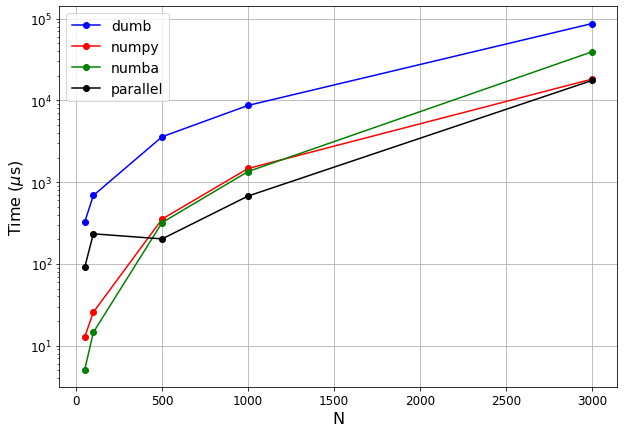

In [5]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N, list_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N, list_time_numba*1e6, 'go-', label = 'numba')
plt.plot(N, list_time_parallel*1e6, 'ko-', label = 'parallel')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()